In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as m
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Task 1
df=pd.read_csv("DS1_C9_S1_Practice_Income_Data.csv")
df

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [3]:
# Task 1(a)
df.shape

(32561, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [5]:
df.describe()

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [6]:
new_df=df
columns=new_df.columns
columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Capital_Gain', 'Capital_Loss',
       'Hours_Per_Week', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [7]:
cat_col=new_df.select_dtypes(include="object")
cat_col

,WorkClass,Education,Marital_Status,Occupation,Relationship,Gender,Native_Country,Income_Bracket
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


In [8]:
# Task 1(b)
cat_columns = cat_col.columns  
def count_cat(col):
    value_counts = cat_col[col].value_counts() 
    print(value_counts)
    print("-------------------------------")
for col in cat_columns:
    count_cat(col)

WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-------------------------------
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
-------------------------------
Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
--------------------

In [9]:
new_df['Native_Country'] = new_df['Native_Country'].replace(to_replace=' ?',value=new_df['Native_Country'].mode()[0])
new_df["WorkClass"]=new_df["WorkClass"].replace(to_replace=' ?',value=new_df['WorkClass'].mode()[0])
new_df["Occupation"]=new_df["Occupation"].replace(to_replace=' ?',value=new_df['Native_Country'].mode()[0])

In [10]:
new_df["WorkClass"].value_counts()

WorkClass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [11]:
new_df["Native_Country"].value_counts()

Native_Country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [12]:
new_df["Occupation"].value_counts()

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
United-States        1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [13]:
# Task 2
new_df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [14]:
cat_col.columns

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [15]:
# Task 3(A)
new_df["WorkClass"]=new_df["WorkClass"].astype("category")
new_df["Education"]=new_df["Education"].astype("category")
new_df["Marital_Status"]=new_df["Marital_Status"].astype("category")
new_df["Occupation"]=new_df["Occupation"].astype("category")
new_df["Relationship"]=new_df["Relationship"].astype("category")
new_df["Gender"]=new_df["Gender"].astype("category")
new_df["Native_Country"]=new_df["Native_Country"].astype("category")
new_df["Income_Bracket"]=new_df["Income_Bracket"].astype("category")

In [16]:
cat_col.columns

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [17]:
new_df.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [18]:
# TASK 3(B)
Label_encoder=preprocessing.LabelEncoder()
new_df["WorkClass_encoder"]=Label_encoder.fit_transform(new_df["WorkClass"])
new_df["Education_encoder"]=Label_encoder.fit_transform(new_df["Education"])
new_df["Marital_status_encoder"]=Label_encoder.fit_transform(new_df["Marital_Status"])
new_df["Occupation_encoder"]=Label_encoder.fit_transform(new_df["Occupation"])
new_df["Relationship_encoder"]=Label_encoder.fit_transform(new_df["Relationship"])
new_df["Gender_encoder"]=Label_encoder.fit_transform(new_df["Gender"])
new_df["Native_Country_encoder"]=Label_encoder.fit_transform(new_df["Native_Country"])
new_df["Income_Bracket_encoder"]=Label_encoder.fit_transform(new_df["Income_Bracket"])

In [19]:
new_df

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encoder,Education_encoder,Marital_status_encoder,Occupation_encoder,Relationship_encoder,Gender_encoder,Native_Country_encoder,Income_Bracket_encoder
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,6,9,4,0,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,5,9,2,3,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,0,5,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,3,1,2,5,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,3,9,2,9,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,...,United-States,<=50K,3,7,2,12,5,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,...,United-States,>50K,3,11,2,6,0,1,38,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,...,United-States,<=50K,3,11,6,0,4,0,38,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,...,United-States,<=50K,3,11,4,0,3,1,38,0


In [20]:
print(new_df["WorkClass_encoder"].value_counts())
print("------------------------------------------")
print(new_df["WorkClass_encoder"].unique())

WorkClass_encoder
3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64
------------------------------------------
[6 5 3 0 1 4 7 2]


In [21]:
print(new_df["Education_encoder"].value_counts())
print("--------------------------------------------")
print(new_df["Education_encoder"].unique())

Education_encoder
11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: count, dtype: int64
--------------------------------------------
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]


In [22]:
print(new_df["Marital_status_encoder"].value_counts())
print("-----------------------------------------------------")
print(new_df["Marital_status_encoder"].unique())

Marital_status_encoder
2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: count, dtype: int64
-----------------------------------------------------
[4 2 0 3 5 1 6]


In [23]:
print(new_df["Occupation_encoder"].value_counts())
print("------------------------------------------")
print(new_df["Occupation_encoder"].unique())

Occupation_encoder
9     4140
2     4099
3     4066
0     3770
11    3650
7     3295
6     2002
14    1843
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
Name: count, dtype: int64
------------------------------------------
[ 0  3  5  9  7 11  2 13  4  6 12 14 10  1  8]


In [24]:
print(new_df["Relationship_encoder"].value_counts())
print("---------------------------------------------")
print(new_df["Relationship_encoder"].unique())

Relationship_encoder
0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: count, dtype: int64
---------------------------------------------
[1 0 5 3 4 2]


In [25]:
print(new_df["Gender_encoder"].value_counts())
print("---------------------------------------")
print(new_df["Gender_encoder"].unique())

Gender_encoder
1    21790
0    10771
Name: count, dtype: int64
---------------------------------------
[1 0]


In [26]:
print(new_df["Native_Country_encoder"].value_counts())
print("---------------------------------------")
print(new_df["Native_Country_encoder"].unique())

Native_Country_encoder
38    29753
25      643
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
39       67
12       64
23       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
24       18
36       18
40       16
27       14
15       13
17       13
33       12
14        1
Name: count, dtype: int64
---------------------------------------
[38  4 22 18 25 34 32 15  8  1 10 19 29 21 30  3  0 36  6 24 35 13 31  5
  7  9 12  2 23 40 28 27 33 37 11 26 39 16 20 17 14]


In [27]:
print(new_df["Income_Bracket_encoder"].value_counts())
print("-----------------------------------------------")
print(new_df["Income_Bracket_encoder"].unique())

Income_Bracket_encoder
0    24720
1     7841
Name: count, dtype: int64
-----------------------------------------------
[0 1]


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     32561 non-null  int64   
 1   WorkClass               32561 non-null  category
 2   Fnlwgt                  32561 non-null  int64   
 3   Education               32561 non-null  category
 4   Marital_Status          32561 non-null  category
 5   Occupation              32561 non-null  category
 6   Relationship            32561 non-null  category
 7   Gender                  32561 non-null  category
 8   Capital_Gain            32561 non-null  int64   
 9   Capital_Loss            32561 non-null  int64   
 10  Hours_Per_Week          32561 non-null  int64   
 11  Native_Country          32561 non-null  category
 12  Income_Bracket          32561 non-null  category
 13  WorkClass_encoder       32561 non-null  int32   
 14  Education_encoder     

In [29]:
# TASK 3(C)
# FEATURE SCALING
def feature_scaling(scale):
    numerics=["int64","int32"]
    new_dup_df=new_df.select_dtypes(include=numerics)
    if scale=="MinMax":
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_dup_df.to_numpy()),columns=new_dup_df.columns)
    return df_scaled

In [30]:
scale="MinMax"
new_copy_df=feature_scaling(scale)
new_copy_df

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encoder,Education_encoder,Marital_status_encoder,Occupation_encoder,Relationship_encoder,Gender_encoder,Native_Country_encoder,Income_Bracket_encoder
0,0.301370,0.044302,0.021740,0.0,0.397959,0.857143,0.600000,0.666667,0.000000,0.2,1.0,0.95,0.0
1,0.452055,0.048238,0.000000,0.0,0.122449,0.714286,0.600000,0.333333,0.214286,0.0,1.0,0.95,0.0
2,0.287671,0.138113,0.000000,0.0,0.397959,0.428571,0.733333,0.000000,0.357143,0.2,1.0,0.95,0.0
3,0.493151,0.151068,0.000000,0.0,0.397959,0.428571,0.066667,0.333333,0.357143,0.0,1.0,0.95,0.0
4,0.150685,0.221488,0.000000,0.0,0.397959,0.428571,0.600000,0.333333,0.642857,1.0,0.0,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.000000,0.0,0.377551,0.428571,0.466667,0.333333,0.857143,1.0,0.0,0.95,0.0
32557,0.315068,0.096500,0.000000,0.0,0.397959,0.428571,0.733333,0.333333,0.428571,0.0,1.0,0.95,1.0
32558,0.561644,0.094827,0.000000,0.0,0.397959,0.428571,0.733333,1.000000,0.000000,0.8,0.0,0.95,0.0
32559,0.068493,0.128499,0.000000,0.0,0.193878,0.428571,0.733333,0.666667,0.000000,0.6,1.0,0.95,0.0


In [31]:
# FEATURE SELECTION
corr=new_copy_df.corr()
corr.style.background_gradient(cmap="coolwarm")

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encoder,Education_encoder,Marital_status_encoder,Occupation_encoder,Relationship_encoder,Gender_encoder,Native_Country_encoder,Income_Bracket_encoder
Age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.040504,-0.010508,-0.266288,0.012626,-0.263698,0.088832,-0.000270,0.234037
Fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.024338,-0.028145,0.028153,-0.000521,0.008931,0.026858,-0.063286,-0.009463
Capital_Gain,0.077674,0.000432,1.000000,-0.031615,0.078409,0.031505,0.030046,-0.043393,0.012350,-0.057919,0.048480,0.008819,0.223329
Capital_Loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,0.002644,0.016746,-0.034187,0.004540,-0.061062,0.045567,0.009401,0.150526
Hours_Per_Week,0.068756,-0.018768,0.078409,0.054256,1.000000,0.042199,0.055510,-0.190519,-0.056995,-0.248974,0.229309,0.006592,0.229689
WorkClass_encoder,0.040504,-0.024338,0.031505,0.002644,0.042199,1.000000,0.004874,-0.020468,0.000725,-0.057947,0.071584,-0.001625,0.002693
Education_encoder,-0.010508,-0.028145,0.030046,0.016746,0.055510,0.004874,1.000000,-0.038407,-0.046443,-0.010876,-0.027356,0.076060,0.079317
Marital_status_encoder,-0.266288,0.028153,-0.043393,-0.034187,-0.190519,-0.020468,-0.038407,1.000000,0.052847,0.185451,-0.129314,-0.021278,-0.199307
Occupation_encoder,0.012626,-0.000521,0.012350,0.004540,-0.056995,0.000725,-0.046443,0.052847,1.000000,-0.014625,0.026116,-0.001079,0.010802
Relationship_encoder,-0.263698,0.008931,-0.057919,-0.061062,-0.248974,-0.057947,-0.010876,0.185451,-0.014625,1.000000,-0.582454,-0.010712,-0.250918


<Axes: >

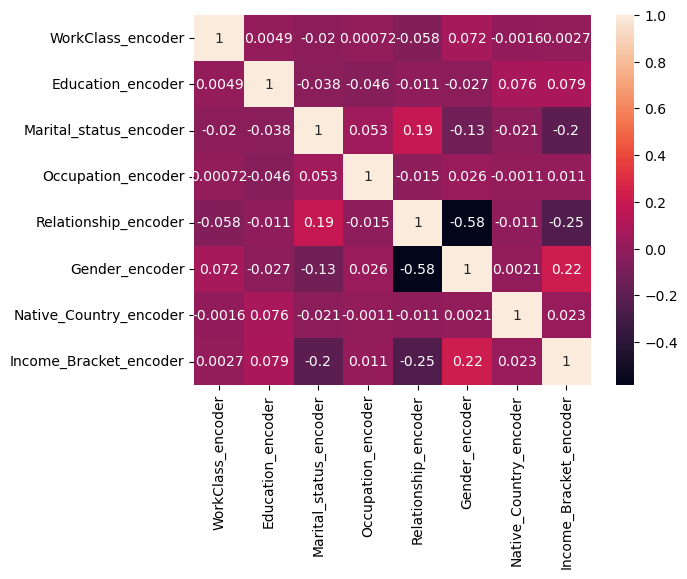

In [32]:
new_pp_ww=new_copy_df[["WorkClass_encoder","Education_encoder","Marital_status_encoder","Occupation_encoder","Relationship_encoder","Gender_encoder","Native_Country_encoder","Income_Bracket_encoder"]]
yy=sns.heatmap(new_pp_ww.corr(),annot=True)
yy

In [33]:
new_df

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encoder,Education_encoder,Marital_status_encoder,Occupation_encoder,Relationship_encoder,Gender_encoder,Native_Country_encoder,Income_Bracket_encoder
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,6,9,4,0,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,5,9,2,3,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,3,11,0,5,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,3,1,2,5,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,3,9,2,9,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,...,United-States,<=50K,3,7,2,12,5,0,38,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,...,United-States,>50K,3,11,2,6,0,1,38,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,...,United-States,<=50K,3,11,6,0,4,0,38,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,...,United-States,<=50K,3,11,4,0,3,1,38,0


In [34]:
# Task 4
train_num=int(32561*0.7)
print(train_num)

22792


In [35]:
train_data=new_df.iloc[0:train_num,:]
test_data=new_df.iloc[train_num:,:]
print("The shape of the train data {} and test data {}".format(train_data.shape,test_data.shape))

The shape of the train data (22792, 21) and test data (9769, 21)


In [36]:
y=new_df["Age"]
x=new_df
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [37]:
print("The shape of Train data {} and shape of Test data {}".format(x_train.shape,x_test.shape))
print("The shape of Train data{} and shape of test data {}".format(y_train.shape,y_test.shape))

The shape of Train data (22792, 21) and shape of Test data (9769, 21)
The shape of Train data(22792,) and shape of test data (9769,)


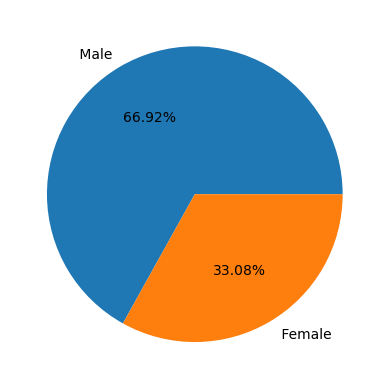

In [38]:
# PIE CHART
plt.pie(new_df["Gender"].value_counts(),labels=new_df["Gender"].value_counts().index,autopct="%.2f%%")
plt.show()

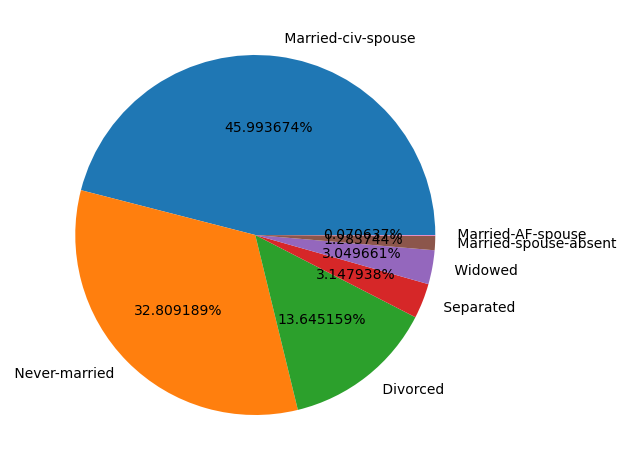

In [39]:
plt.pie(new_df["Marital_Status"].value_counts(),labels=new_df["Marital_Status"].value_counts().index,autopct="%2f%%")
plt.tight_layout()
plt.show()

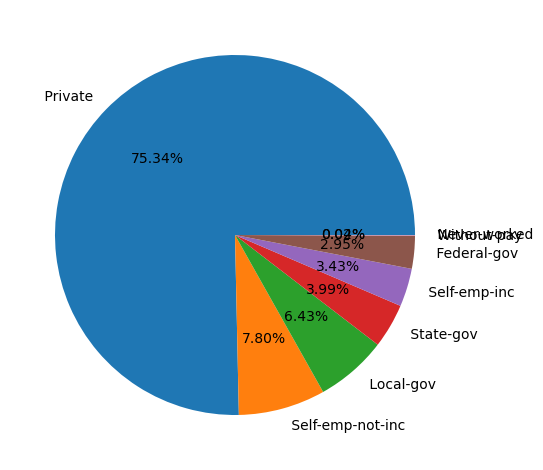

In [40]:
plt.pie(new_df["WorkClass"].value_counts(),labels=new_df["WorkClass"].value_counts().index,autopct="%.2f%%")
plt.tight_layout()
plt.show()

In [85]:
cat_col=new_df.select_dtypes(include="category")
cat_col

,WorkClass,Education,Marital_Status,Occupation,Relationship,Gender,Native_Country,Income_Bracket
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


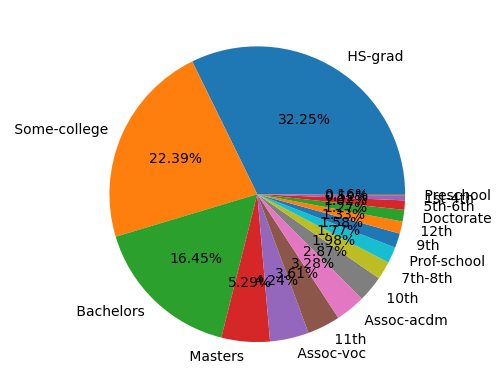

In [89]:
plt.pie(cat_col["Education"].value_counts(),labels=cat_col["Education"].value_counts().index,autopct="%.2f%%")
plt.show()

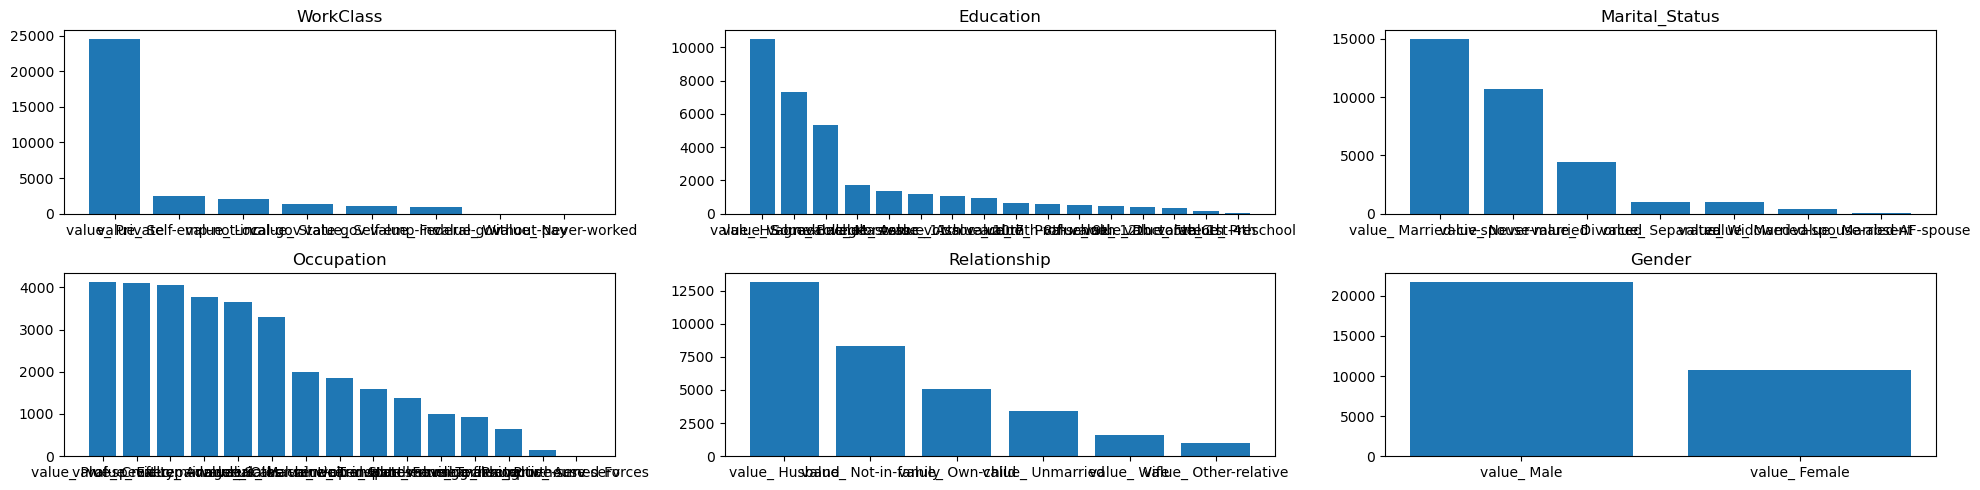

In [93]:
num_cols = 3
cat_loan_df = new_df.select_dtypes('category')
categorical_cols=cat_col.columns
categorical_cols
num_rows = int(len(categorical_cols)/num_cols)
fig,axs = plt.subplots(num_rows,num_cols , tight_layout = True, figsize = (20,5))
for col, ax in zip(categorical_cols, axs.flatten()[:len(categorical_cols)]):
    stats = cat_loan_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
plt.show()